# Week 8: Turing Machines

In [1]:
from tock import *

## Monday reading

Read Section 3.1 and 3.3.

## Tuesday class

### Turing machines, finally

By now, the definition of Turing machines (TMs) should be easy to understand. But pay special attention to the distinction between _Turing-recognizable_ (a.k.a. "recursively enumerable" or "computably enumerable") and _(Turing-)decidable_ (a.k.a. "recursive" or "computable"). When a TM runs on an input string, there are three possible outcomes: halt and accept, halt and reject, and loop (which is treated as a reject).

We distinguish between two kinds of TMs: TMs and _decider_ TMs. A TM can accept, reject, or loop on a string, whereas a decider TM must either accept or reject, but never loop. Then, a language $L$ is Turing-recognizable iff there is a TM that accepts all and only the strings in $L$. And $L$ is (Turing-)decidable iff there is a decider TM that accepts all and only the strings in $L$.

This is a distinction we haven't worried about in the past. Why? Deterministic FAs and PDAs always halt, so there's no distinction between accepting and deciding. Nondeterministic FAs and PDAs can have $\varepsilon$ loops, but it's easy to change such machines into an equivalent ones that do not loop. So the distinction is unimportant. With Turing machines (which are deterministic unless stated otherwise), the distinction is _extremely_ important.

There are many variations out there in the definition of TM. Be careful if you refer to other sources. We're going to allow one small extension to Sipser's definition. In Sipser's definition, $\delta(q, a) = (r, b, d)$, where $d \in \{\text{L}, \text{R}\}$. Following Turing's original definition, we'll also allow $d = \text{S}$ for "stay". (You may also see me write $\text{N}$ for "no move", which means exactly the same thing.)

People have built various [physical](http://aturingmachine.com) [Turing](https://www.youtube.com/watch?v=ivPv_kaYuwk) [machines](https://www.youtube.com/watch?v=40DkJ9vt5CI&t=14s), including TMs made out of [Lego Mindstorms](https://vimeo.com/channels/staffpicks/44202270), [Lego and air tubes](https://videotheque.cnrs.fr/doc=3001), [wood](https://www.youtube.com/watch?v=vo8izCKHiF0), and [Redstone](https://www.youtube.com/watch?v=pJO__eTIqb0).

### Examples: formal descriptions

Here are the book's two examples of formal descriptions. Tock's notation is slightly different from Sipser's: it uses a caret (`^`) to specify the movement of the head. So $a \rightarrow \hat{} b$ means "read $a$, write $b$, and move left," while $a \rightarrow b \hat{}$ means "read $a$, write $b$, and move right." And $a \rightarrow b$ means "read $a$, write $b$, and don't move."

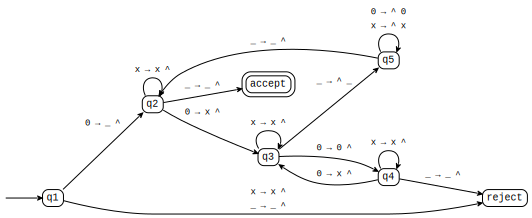

In [2]:
m2 = read_csv("tm-m2.csv")
m2

In [11]:
run(m2, "0 0 0 0").only_path()

q1,[0] 0 0 0
q2,_ [0] 0 0
q3,_ x [0] 0
q4,_ x 0 [0]
q3,_ x 0 x ^
q5,_ x 0 [x]
q5,_ x [0] x
q5,_ [x] 0 x
q5,[_] x 0 x
q2,_ [x] 0 x
q2,_ x [0] x


In [13]:
run(m2, "0 0 0 0 0 0").only_path()

q1,[0] 0 0 0 0 0
q2,_ [0] 0 0 0 0
q3,_ x [0] 0 0 0
q4,_ x 0 [0] 0 0
q3,_ x 0 x [0] 0
q4,_ x 0 x 0 [0]
q3,_ x 0 x 0 x ^
q5,_ x 0 x 0 [x]
q5,_ x 0 x [0] x
q5,_ x 0 [x] 0 x
q5,_ x [0] x 0 x


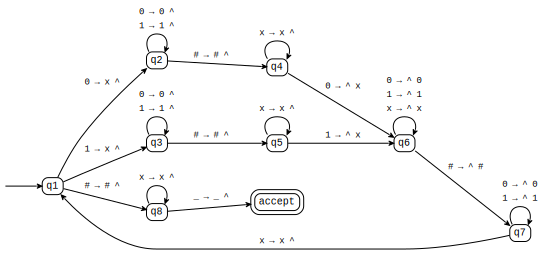

In [5]:
m1 = read_csv("tm-m1.csv")
m1

Note that in this example, the reject state has been omitted. If at any point in the run, there is no transition defined for the current state and symbol, the machine rejects. You can do this when you write formal descriptions of TMs also.

In [7]:
run(m1, "0 1 0 # 0 1 0").only_path()

q1,[0] 1 0 # 0 1 0
q2,x [1] 0 # 0 1 0
q2,x 1 [0] # 0 1 0
q2,x 1 0 [#] 0 1 0
q4,x 1 0 # [0] 1 0
q6,x 1 0 [#] x 1 0
q7,x 1 [0] # x 1 0
q7,x [1] 0 # x 1 0
q7,[x] 1 0 # x 1 0
q1,x [1] 0 # x 1 0
q3,x x [0] # x 1 0


In [14]:
run(m1, "0 1 0 # 0 1 1").only_path()

q1,[0] 1 0 # 0 1 1
q2,x [1] 0 # 0 1 1
q2,x 1 [0] # 0 1 1
q2,x 1 0 [#] 0 1 1
q4,x 1 0 # [0] 1 1
q6,x 1 0 [#] x 1 1
q7,x 1 [0] # x 1 1
q7,x [1] 0 # x 1 1
q7,[x] 1 0 # x 1 1
q1,x [1] 0 # x 1 1
q3,x x [0] # x 1 1


### Writing Turing machines

Writing Turing machines is extremely tedious -- much more so than assembly language. There are two ways you can reduce the tedium.

One scheme that several textbooks use (but Sipser doesn't and we don't require you to learn it) is to introduce macros. That is, in the state transition diagram of a TM, a node can be labeled with either a state or the name of another TM. If machine $M$ reaches a node labeled with another TM $M'$, then $M'$ is run until it reaches its accept state; then control returns to $M$ right where it left off. You're welcome to do this if you want.

For example, in $M_1$ above, the same subgraph appears twice (states $q_2, q_4$ are the same as states $q_3, q_5$). So we could simplify it to:
![m1a](tm-m1a.pdf)
where $M'$ is:
![m1b](tm-m1b.pdf)

However, Sipser quickly graduates you from formal descriptions of machines to _implementation-level descriptions_. These are like pseudocode, maybe even a little higher-level than pseudocode. Implementation-level descriptions still speak in terms of the head moving on the tape and reading and writing symbols on the tape. They shouldn't, for example, make use of variables or arithmetic. See the examples in the book to get an idea of what is allowed and what isn't.

It's fair game to use macros in implementation-level descriptions, too: if you define a TM $M'$, then in the course of defining $M$, you can write "simulate $M'$."

### The Church-Turing thesis

Recall that Turing's original paper (1936) proposed Turing machines as a model of what _humans_ do when they compute. He imagined a computing person in an idealized scenario:

- He has an infinitely long paper tape, divided into squares.
- He can write one symbol in each square, and the number of possible symbols is finite (e.g., `0` to `9`).
- He can only look at a finite number of squares at a time. 
- He can only move a finite distance at a time.
- He has only a finite number of “states of mind.”

Basically this is an appeal to intuition that when people compute, this is what they do. Furthermore, he had to argue (quite briefly) that Turing machines can perform any such computation. This came to be known as the Church-Turing thesis (CTT).

One [brief statement](http://www.alanturing.net/turing_archive/archive/l/l32/L32-005.html) of the thesis: "[Turing] machines can do anything that could be described as 'rule of thumb' or 'purely mechanical'." [Elsewhere](http://www.turingarchive.org/viewer/?id=149&title=14), he characterized these problems as "those problems which can be solved by human clerical labour, working to fixed rules, and without understanding."

In addition to Turing's original justification, another justification for the CTT, the one more commonly cited today, is that many proposals have been made for models of computability, and for the most part they have all turned out to be equivalent to Turing machines.

The end of Section 3.2 alludes to some of these. The most important ones are probably:

- The [untyped lambda calculus](https://en.wikipedia.org/wiki/Lambda_calculus)
- [Partial recursive functions](https://en.wikipedia.org/wiki/Μ-recursive_function)
- [Unrestricted grammars](https://en.wikipedia.org/wiki/Unrestricted_grammar)

[Accidentally Turing Complete](http://beza1e1.tuxen.de/articles/accidentally_turing_complete.html) is a collection of other weird things that are equivalent to TMs.

An important subcase of this argument is that no matter how we try to augment Turing machines to make them more powerful, they turn out to be equivalent to standard Turing machines. This is the topic of the next class.

## Wednesday reading

Read Section 3.2.

## Thursday class

**Question.** Name every possible thing you could imagine adding to a Turing machine to make it more powerful.

First of all, there were already some extensions in Turing's image of a human computer:

- He is allowed to look at multiple (but finitely many) squares at a time.
- He is allowed to move multiple (but finitely many) squares to the left or right.
- Furthermore, Turing also mentions the possibility of a two-dimensional grid.

Turing argued in his original paper that a TM which can look at multiple squares or move multiple squares can be converted into a standard TM by adding more states. A two dimensional grid can be simulated in a manner similar to multiple tapes (see below).

The book discusses two bigger extensions which are used later: multiple tapes, and nondeterminism. Multiple tapes are described clearly enough in the book; a few comments here on nondeterminism.

### Nondeterminism

We can make Turing machines nondeterministic, similarly to how we made finite automata nondeterministic. Remarkably, NTMs are no more powerful than TMs. But if it were possible to build a real NTM, it would be useful for all kinds of very very practical things, because it would be (we think) so much faster than a deterministic TM. That speed difference is the focus of Unit Four.

When defining NTMs, we must pay attention to the distinction between recognizing and deciding. A NTM accepts a string iff at least one branch of the computation accepts it. The other branches can reject or loop. A NTM is a _decider_ iff _all_ of its branches halt (not loop).

So a NTM recognizes a language $L$ iff for each string $w \in L$, there is at least one branch that accepts $w$, and the other branches either reject or loop on $w$; and for each string $w \notin L$, all branches either reject or loop on $w$. And a decider NTM decides a language $L$ iff for each string $w \in L$, there is at least one branch that accepts $w$, and the other branches reject $w$; and for each string $w \notin L$, all branches reject $w$.

The proof of Theorem 3.16 treats the computation as a directed tree. Each node is a configuration, and each edge is a step of the computation. The simulating DTM does a breadth-first search (BFS) on this tree. Each node in the tree is given an address (known as a Gorn address), which is stored on tape 3. The proof is a little bit unclear on one point: Stage 4 just says "Replace the string on tape 3 with the next string in the string ordering," but doesn't explain what the ordering is -- it's the order defined on page 14, which causes the addresses to be listed in breadth-first order.

### Random-access memory

An extension that the book does not discuss is *random-access memory*. Standard Turing machines access their memory (tape) by moving a head one location at a time. Extending them to be able to access any memory location results in a new kind of machine, the *RAM machine*, which was defined in [a paper by Cook and Reckhow in 1973](https://doi.org/10.1016/S0022-0000(73)80029-7).

A RAM machine's memory consists of a tape extending infinitely to the right. The cells are named $X[0], X[1], X[2], \ldots$. But instead of each cell containing a symbol drawn from a finite alphabet, each cell contains a (positive, negative, or zero) integer. 

The states are numbered consecutively from the initial state $0$. Unless otherwise specified, after each operation, the machine goes to the next-numbered state. (Just like assembly language.)

Whereas a Turing machine's operations each consisted of a read, a write, and a move, a RAM machine has the following possible operations:

- $X[i] \leftarrow C$ where $C$ is an integer: write $C$ to memory location $X[i]$.
- $X[i] \leftarrow X[j] + X[k]$: read $X[j]$ and $X[k]$, add them, and write the result in $X[i]$.
- $X[i] \leftarrow X[j] - X[k]$: read $X[j]$ and $X[i]$, subtract them, and write the result in $X[i]$.
- $X[i] \leftarrow X[X[j]]$: read address from $X[j]$, read the contents of that address, and write to $X[i]$.
- $X[X[i]] \leftarrow X[j]$: read $X[j]$, read address from $X[i]$, write $X[i]$ to the contents of that address.
- $\texttt{TRA}~m~\text{if $X[j] > 0$}$: read $X[j]$ and if it's positive, go to state $m$.

A RAM machine can be simulated on a Turing machine. In Cook and Reckhow's construction, the memory is represented as the tape

$$\$\mathord*a_1\#c_1\mathord*a_2\#c_2\cdots\mathord*a_n\#c_n¢$$

where each $c_i$ is the contents of memory address $a_i$. Additional tapes are used for two registers and scratch space.

The reason RAM machines are of interest is because RAM machines (not Turing machines) are the theoretical "hardware" that you will use to analyze algorithms in Algorithms class. 

But are real computers more like Turing machines or RAM machines? We'll take this question up again later in Unit IV.

### Beyond

A RAM machine program looks very much like an assembly language program; could we go further and compile real assembly language, or even a high-level programming language, into Turing machines? Indeed we can -- the [ELVM project](https://github.com/shinh/elvm) defines a simple virtual machine with a simple assembly language, EIR, and provides a compiler from (a slightly restricted) C to EIR, as well as backends that translate EIR to various "esoteric languages," one of which is Turing machines. So you can compile a C program into a Turing machine.

ELVM comes with a TM simulator written in C. What happens if you run the C-to-TM compiler on the TM simulator? That is the subject of the next class.